# Problem Set 1 CS174
---
The following problem set will focus on the lessons on Python and basic string manipulation. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards) **1 pt.**

2. Write a function that checks whether a number is prime or not **1 pt.**

3. Load `data/allstar.txt` and create a dictionary where the keys are the verses or chorus numbers, and the values are the chords for that part of the song. **4 pts.**
`{ "verse1": "Am, C, D, G, F, G, G, Bm", "chorus1": "C, Am, G, D, C, Am, G, D, C"..}`

4. Build a dictionary from `data/allstar.txt` where the keys are the unique words, and the values are the number of times the word appeared in the song. **4 pts.**

5. Load `Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html` and find out the ff (show the code): **10 pts.**
       - How many unique words are there?
       - List what will Rick Astley never do?
       - Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to **Item 4.**
       - Use the dictionary from above to create a word count histogram.
       
### Bonus:
Compare any non-English song (as long as lyrics are Romanized ) and a contemporary one in English, and create word frequency histograms of both. Compare and discuss any interesting findings or insights. **5 pts.**

Deadline **Feb 4 11:59PM**. Submission link to be posted in Moodle. 
Submit the .ipynb file only with name <SURNAME>_<ID NUMBER>.ipynb. 
    
Sample: **"BAUTISTA_110464.ipynb"**

In [1]:
import time
print("Starting probset at {}".format(time.ctime()))

Starting probset at Thu Jan 30 14:24:14 2020


## 1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards)

In [5]:
def reverse_string(string):
    rev_string =""
    for i in range(len(string)):
        rev_string+=string[len(string)-i-1]
    return rev_string

def check_palindrome(string):
    if string == reverse_string(string):
        return True
    else:
        return False
    
def check_palindrome_alt(string):
    check = True
    i=0
    while check and len(string)-1 != i:
        if string[len(string)-i-1] == string[i]:
            check = True
            i+=1
        else: 
            check = False
    return check
        

In [14]:
string1 = "dahfgkasjdhfgakwservservsrvs3v424234v23ehfknausefckusfaevaervserbaseljfhvseaehcnraksehrackeshrackesucesucrkseuucucnrkaseurcnkuksdjhfksjdhfskdjfhskdjfhskdjfhskdjfhskjdfhskdjfhskurehfks nekfuhsekufsrvesrserbserbserberb3rb3rbw3rbrbsferfbrr2br2br2ber2berb2erb2erb2erb2erb2eb2r23b34234b324hsckehscerkjsehcrsekrhscklhafcnsuenv3489y39485739845hn7honsyoiuyfbosvuyfovs78bryvo7isyfov7sryfkhrkva"
string = string1 + reverse_string(string1)
print('method I:')
%time print('Positive result: {}'.format(check_palindrome(string)))
%time print('Negative result: {}'.format(check_palindrome(string1)))
print('-'*10)
print('method II:')
%time print('Positive result: {}'.format(check_palindrome_alt(string)))
%time print('Negative result: {}'.format(check_palindrome_alt(string1)))

method I:
Positive result: True
CPU times: user 391 µs, sys: 24 µs, total: 415 µs
Wall time: 413 µs
Negative result: False
CPU times: user 180 µs, sys: 45 µs, total: 225 µs
Wall time: 194 µs
----------
method II:
Positive result: True
CPU times: user 467 µs, sys: 14 µs, total: 481 µs
Wall time: 474 µs
Negative result: False
CPU times: user 150 µs, sys: 99 µs, total: 249 µs
Wall time: 186 µs


## 2. Write a function that checks whether a number is prime or not **1 pt.**

In [42]:
import math
def check_prime(number):
    if number <= 1:
        return False
    if number == 2:
        return True
    if number%2==0:
        print('even')
        return False
    for i in range(math.ceil(math.sqrt(number)))[3::]:
        if number%i==0:
            print(number,i)
            return False
    return True
    

In [48]:
check_prime(100153)

True

## 3. Load `data/allstar.txt` and create a dictionary where the keys are the verses or chorus numbers, and the values are the chords for that part of the song. **4 pts.**
`{ "verse1": "Am, C, D, G, F, G, G, Bm", "chorus1": "C, Am, G, D, C, Am, G, D, C"..}`

In [231]:
with open('data/allstar.txt', 'r') as f:
    file = [line.strip('\n').strip() for line in f]
#get parts of song
# parts = None
file_token = [line.split() for line in file if line!='\n']
parts = [part.strip() for part in file if '[' in part]

In [232]:
parts

['[Verse1]', '[Chorus1]', '[Verse2]', '[Chorus2]', '[Verse3]', '[Chorus3]']

In [233]:
indices_parts= [file.index(part) for part in parts]
indices_parts

[0, 25, 34, 51, 68, 93]

In [263]:
chords_per_section = {
    parts[0]:file_token[1:24:2],
    parts[1]:file_token[26:33:2],
    parts[2]:file_token[35:50:2],
    parts[3]:file_token[52:67:2],
    parts[4]:file_token[69:92:2],
    parts[5]:file_token[94::2]
}

In [281]:
for k,v in chords_per_section.items():
    print(k,v)
    print('-'*10)
#this took me way too fucking long...

[Verse1] [['G', 'D', 'Am', 'C'], ['G', 'D', 'Am', 'C'], ['G', 'D', 'Am'], ['C', 'G', 'D', 'Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C']]
----------
[Chorus1] [['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m'], ['C', 'G', 'F', 'C']]
----------
[Verse2] [['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C']]
----------
[Chorus2] [['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m'], ['C', 'G', 'F', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m'], ['C', 'G', 'F', 'C']]
----------
[Verse3] [['G', 'D', 'Am', 'C'], ['G', 'D', 'Am', 'C'], ['G', 'D', 'Am', 'C'], ['G', 'D', 'Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C'], ['G', 'D'], ['Am', 'C']]
----------
[Chorus3] [['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m', 'C'], ['G', 'C', 'C#m'], ['C', 'G', 'F', 'C']]
----------


In [297]:
unique_chords = [chord for chord in chords_per_section.values()]
unique_chords = [chord for line in unique_chords for chord in line]
unique_chords = [chord for line in unique_chords for chord in line]
unique_chords = set(unique_chords)
unique_chords

{'Am', 'C', 'C#m', 'D', 'F', 'G'}

## 4. Build a dictionary from `data/allstar.txt` where the keys are the unique words, and the values are the number of times the word appeared in the song. **4 pts.**

In [325]:
from nltk import FreqDist

In [326]:
dist = FreqDist([word for line in file_token for word in line])

In [327]:
distribution = dict(dist)

In [328]:
distribution = sorted(distribution.items(), key=lambda kv: kv[1], reverse = True)

In [329]:
#filter out chords
distribution_filtered = [(item[0],item[1]) for item in distribution if item[0] not in unique_chords and item[1]>4]

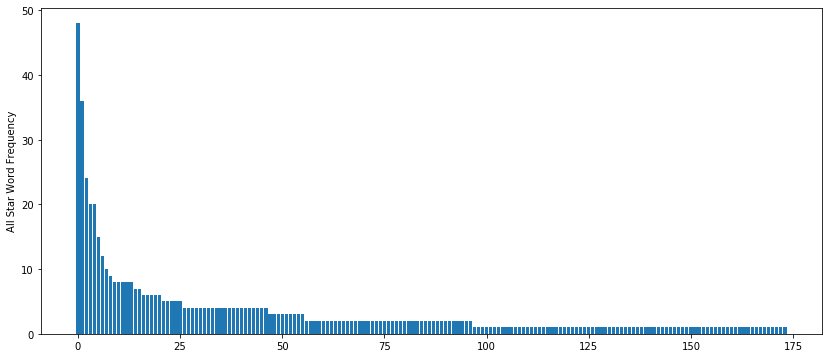

In [336]:
import matplotlib.pyplot as plt
import numpy as np

word = [word[0] for word in distribution]
freq = [word[1] for word in distribution]
x_pos = np.arange(len(word)) 

plt.figure(figsize=(14,6))
plt.bar(x_pos,freq)
# plt.xticks(x_pos, word,fontsize=11) 
plt.ylabel('All Star Word Frequency')
plt.show()

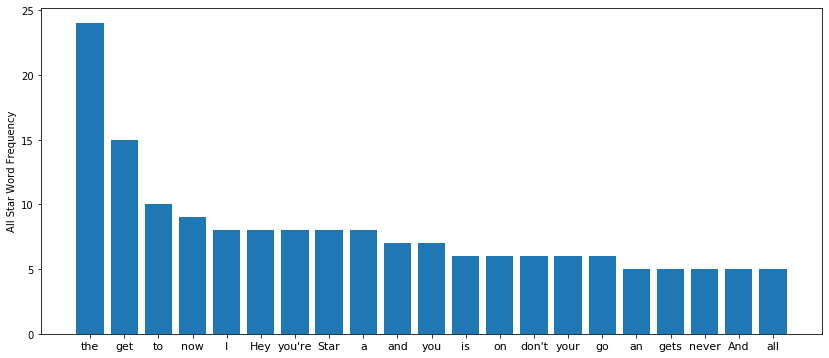

In [338]:
word = [word[0] for word in distribution_filtered]
freq = [word[1] for word in distribution_filtered]
x_pos = np.arange(len(word)) 

plt.figure(figsize=(14,6))
plt.bar(x_pos,freq)
plt.xticks(x_pos, word,fontsize=11) 
plt.ylabel('All Star Word Frequency')
plt.show()

In [339]:
print("Ending probset at {} lol".format(time.ctime()))

Ending probset at Thu Jan 30 16:26:11 2020 lol
